In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false;
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
}
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

2021-12-12 13:37:00.347738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-12 13:37:00.347763: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# The function that we are going to learn
from math import sin as sine

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">To teach our ANN sine() we need to show it some examples of sine.</p>  
<p style="font-size:20px">To that end, we generate some examples, y = sine (x)</p>
<p style="font-size:20px">Let's teach our ANN about sine between 0 and 90'</p>



In [4]:
x = list (range (0, 32))                               # x = { 0 ... 31 }
pi_2 = 3.1415926 / 2                                   # π/2 radians (90 degrees)
alpha = pi_2 / 32                                      # The increment
x_radians = list (map (lambda x: alpha * x, x))        # x_radians = { 0 ... π/2 }

y = list (map (lambda x: sine (x), x_radians))         # y = { sine (x0) ... , sine (x31) }


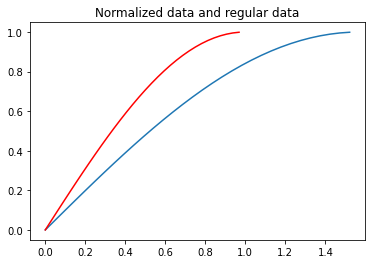

In [5]:

plt.plot (x_radians, y)                                # y = sine (x), the blue curve

xN = list (map (lambda x: x / pi_2, x_radians))        # Normalize, 0 ≤ x ≤ 1

plt.plot (xN, y, c="r")                                # sine is naturally normalized, red curve

plt.title ("Normalized data and regular data")

plt.show ()

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We will use Keras to build our ANN.</p>
<p style="font-size:20px">Keras is fully featured implementation optimized for GPUs.</p>
<p style="font-size:20px">Our Roadmap is as follows:</p>


<ul style="font-size:20px">
    <li>Create a model object.</li>
    <li>Specify our ANN's architecture</li>
    <li>Request Keras to build our ANN</li>
    <li>Train our ANN with our examples</li>
</ul>



In [6]:
model = Sequential()                                           # Keras container for our model

model.add(Dense(5, input_dim=1, activation='sigmoid'))         # First layer, one input (x), 5 neurons
model.add(Dense(3, activation='sigmoid'))                      # Second layer, 3 neurons
model.add(Dense (1, activation='sigmoid'))                     # One output, y (hopefulle sine (x)!)

model.compile (loss='mean_squared_error', optimizer='adam')    # Build our ANN

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


2021-12-12 13:37:01.718008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-12 13:37:01.718031: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-12 13:37:01.718068: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2021-12-12 13:37:01.718282: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Train our model
h = model.fit (xN, y, verbose = False, epochs=5000)

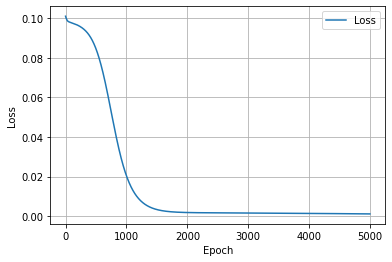

In [8]:
def LossHistory (history):
  plt.plot (history.history['loss'], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">How well did we do?</p>
<p style="font-size:20px">We can compare our training data to the ANN's answers.</p>



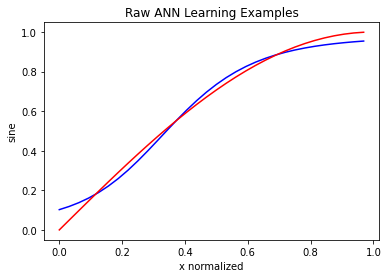

In [9]:
plt.plot (xN, model.predict (xN), c="b")
plt.plot (xN, y, c="r")
plt.xlabel ("x normalized")
plt.ylabel ("sine")
plt.title ("Raw ANN Learning Examples")
plt.show ()

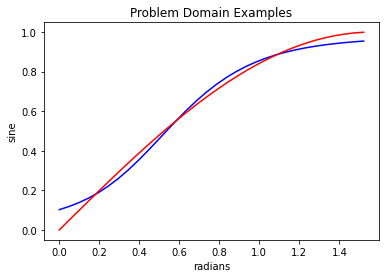

In [ ]:
# We're plotting with radians, but we still invoke our ANN with normalized data
plt.plot (x_radians, model.predict (xN), c="b")

plt.plot (x_radians, y, c="r")
plt.xlabel ("radians")
plt.ylabel ("sine")
plt.title ("Problem Domain Examples")
plt.show ()